In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import sc

In [15]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

df = pd.read_csv('diabetes.csv',names = col_names)

In [41]:
df = df.iloc[1:]
df.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
6,5,116,74,0,0,25.6,0.201,30,0


In [28]:
#split dataset in features and target variable

feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = df[feature_cols] # Features
y = df.label # Target variable

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [30]:
clf = DecisionTreeClassifier()

In [31]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [32]:
y_pred = clf.predict(X_test)

In [34]:
metrics.accuracy_score(y_pred,y_test)

0.696969696969697

In [37]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

In [56]:
clf_ent = DecisionTreeClassifier(criterion="entropy",max_depth = 7)
clf_ent.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [ ]:
y_pred_ent = clf_ent.predict(X_test)
metrics.accuracy_score(y_pred_ent,y_test)

In [60]:
X.head()

,pregnant,insulin,bmi,age,glucose,bp,pedigree
1,6,0,33.6,50,148,72,0.627
2,1,0,26.6,31,85,66,0.351
3,8,0,23.3,32,183,64,0.672
4,1,94,28.1,21,89,66,0.167
5,0,168,43.1,33,137,40,2.288


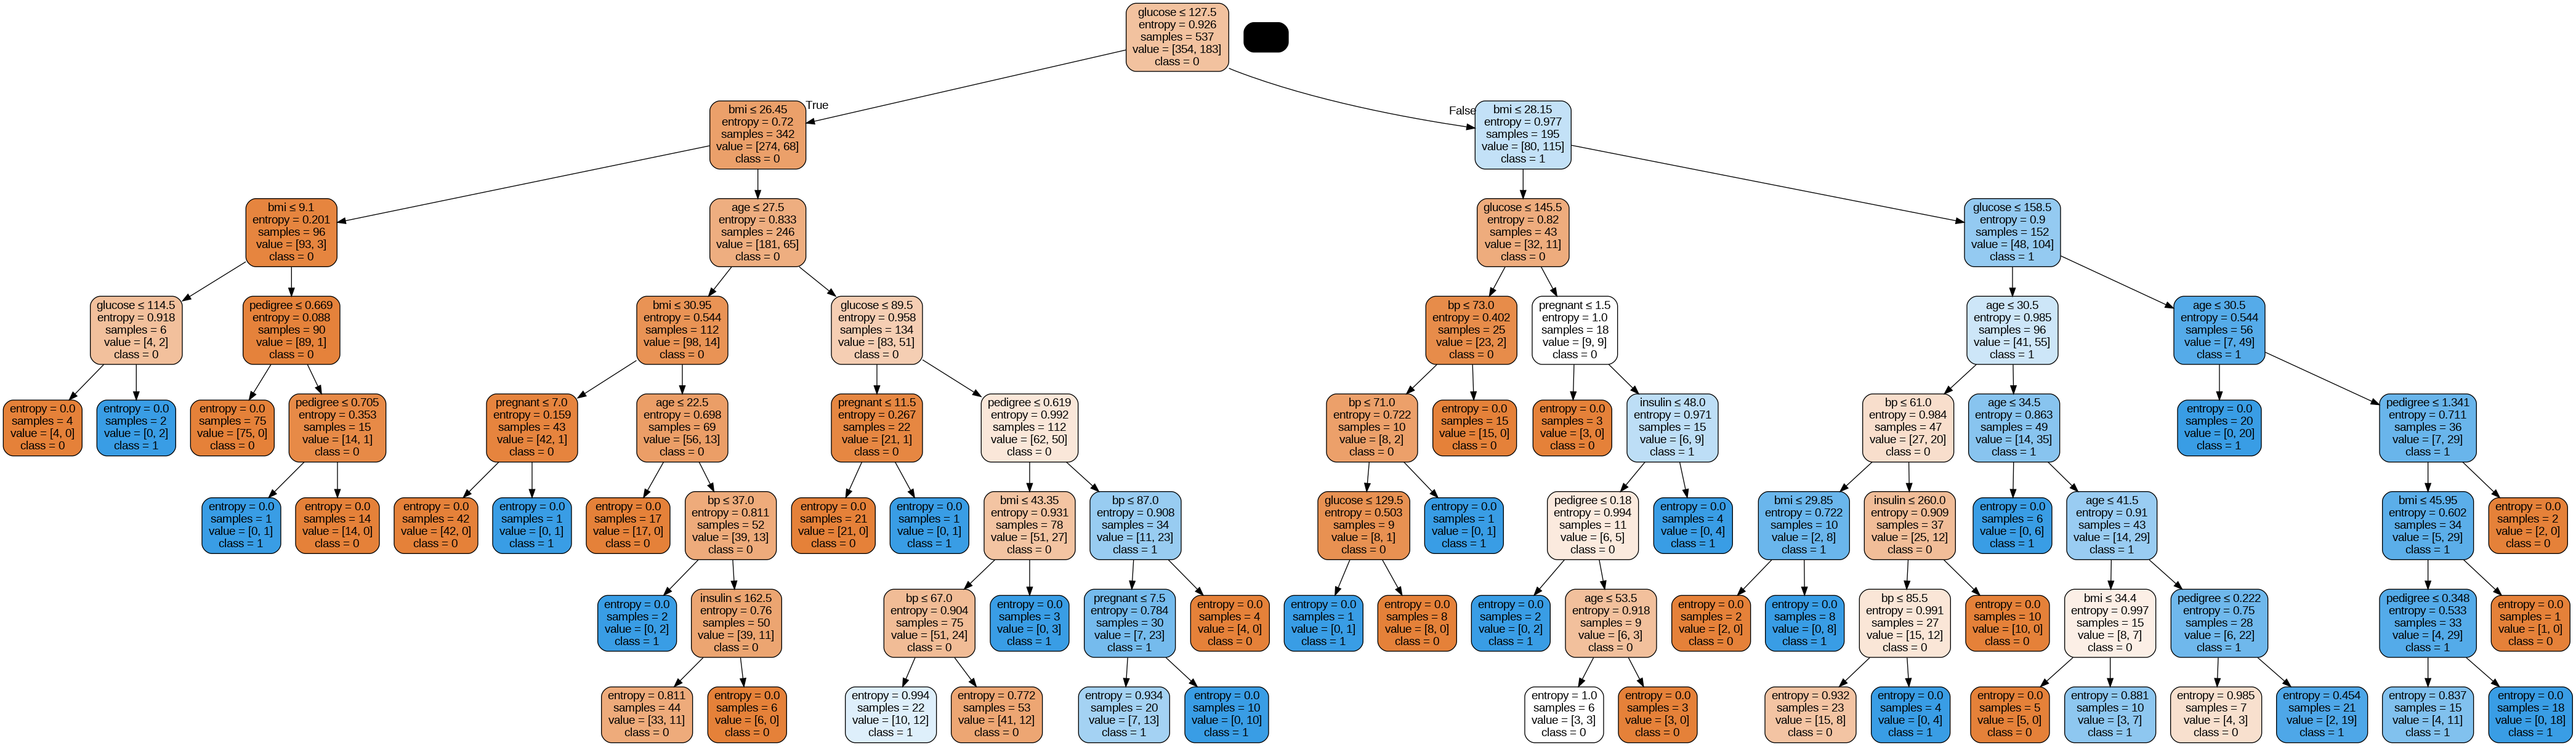

In [58]:

dot_data = StringIO()
export_graphviz(clf_ent, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes_ent.png')
Image(graph.create_png())